In [1]:
import json
import requests
from camera_pi import Camera
from io import BytesIO
from PIL import Image
from time import sleep
from datetime import datetime
from matplotlib.pyplot import imshow
import numpy as np

camera = Camera()
vision_api_key = 'a5a3c94b1dee4faa8047873e73e5e642'
vision_api_url = 'https://chinaeast2.api.cognitive.azure.cn/vision/v2.0/analyze'

def WhatDoYouSee():
    image_path = './faces/Detection_%s.png' %(datetime.now().strftime('%Y%m%d_%H%M%S'))
    with open(image_path, 'wb') as f:
        f.write(camera.get_frame())
        f.close()
    print('Image captured!')
    image = Image.open(image_path, 'r')
    imshow(np.asarray(image))
    image_data = open(image_path, "rb").read()
    headers = {
        'Content-Type': 'application/octet-stream',
        'Ocp-Apim-Subscription-Key': vision_api_key,
    }
    params = {
        'visualFeatures': 'Categories,Description,Color',
    }

    try:
        api_url = vision_api_url 
        response = requests.post(api_url, headers=headers, data=image_data, params=params)
        response.raise_for_status()
        print ('Respose:')
        print(response.json())
        parsed = json.loads(response.text)
        if len(parsed) == 0:
            parsedText = 'I see nothing'
        else:
            tag_str = ''
            for num_tags in range(5):
                tag_str += parsed['description']['tags'][num_tags] + ', '
            parsedText = 'I see %s. Top 5 tags are: %s' % (parsed['description']['captions'][0]['text'], tag_str)
#         print(parsedText)
#         print(json.dumps(parsed, sort_keys=True, indent=2))
    except Exception as e:
#         print('Error:')
#         print(e)
        parsedText = e

    return parsedText


Starting camera thread.


Image captured!
Respose:
{'categories': [{'name': 'abstract_', 'score': 0.00390625}, {'name': 'abstract_shape', 'score': 0.109375}, {'name': 'others_', 'score': 0.21484375}, {'name': 'outdoor_', 'score': 0.0078125, 'detail': {'landmarks': []}}], 'color': {'dominantColorForeground': 'White', 'dominantColorBackground': 'Black', 'dominantColors': ['Black', 'White'], 'accentColor': '130B06', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['building', 'window', 'sitting', 'table', 'large', 'pizza', 'room', 'wooden', 'kitchen', 'standing', 'oven', 'bed', 'clock', 'white', 'man', 'train'], 'captions': [{'text': 'a person standing in front of a window', 'confidence': 0.5697625735759266}]}, 'requestId': '8e878999-efcf-4632-96a2-fc1f1311987e', 'metadata': {'width': 800, 'height': 640, 'format': 'Jpeg'}}
I see a person standing in front of a window. Top 5 tags are: building, window, sitting, table, large, 


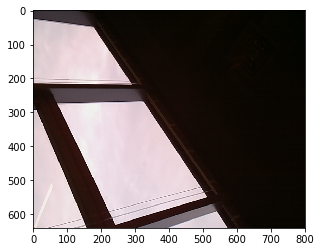

In [2]:
print(WhatDoYouSee())